In [6]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import seaborn as sns
sns.set()
sns.set_style("white")

SAVEPLOTS = False

# Hubbard Model at the Mean Field Level

In [7]:
def oneDimensionalChain(N):
    HoppingMatrix = np.zeros( ( N , N ) , dtype = np.float64)
    ##  Set the elements of the hopping matrix that define PBC corresponding to the ends of the 1D chain
    HoppingMatrix[0, 1] += 1.;
    HoppingMatrix[0, N - 1] += 1.;
    HoppingMatrix[N - 1, 0] += 1.;
    HoppingMatrix[N - 1, N - 2] += 1.;
    ##  Set the remaining ones
    for i in range(1, N - 1):
        HoppingMatrix[i, i - 1] += 1.; HoppingMatrix[i, i + 1] += 1.;
    return HoppingMatrix

def iRibbon(x, y, z, Nx, Ny):
    return Nx * Ny * z + Nx * y + x

def nanoribbon(N, Ny):
    Nx = int(N / Ny / 2)
    K = np.zeros((2 * Nx * Ny, 2 * Nx * Ny) , dtype = np.float64)
    for x in range(Nx):
        for y in range(Ny):
            if y == (Ny - 1) :
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
            else:
                if x == 0:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(0, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(Nx - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x - 1, y + 1, 1, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x - 1, y + 1, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
    for x in range(Nx):
        for y in range(Ny):
            if y == 0 :
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
            else:
                if x == Nx - 1:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(Nx - 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(0, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(0, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(Nx - 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(0, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                else:
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 1, Nx, Ny), iRibbon(x + 1, y - 1, 0, Nx, Ny)] = 1
                    K[iRibbon(x, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1
                    K[iRibbon(x + 1, y - 1, 0, Nx, Ny), iRibbon(x, y, 1, Nx, Ny)] = 1

    return K

## Define the fermi function for both zero and finite temperature

In [8]:
def fermi(e, mu, beta):
    '''
    For zero temperature, set beta = -1
    '''
    if beta == -1:
        return (e < mu).astype(int)
    else:
        return 1 / ( 1 + np.exp( beta * ( e - mu ) ) )

## Function that makes the plots

In [9]:
def plot(nUp, nDown, energies, it):    
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left \langle n_{i,\sigma} \right\rangle$')

    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(flatui)
    ax.plot(np.arange(N) + 1, nUp, color = "#e74c3c", label = r'$\left \langle n_{i,\uparrow} \right\rangle$',\
           linewidth = 1)
    ax.plot(np.arange(N) + 1, nDown, color = "#95a5a6", label = r'$\left \langle n_{i,\downarrow} \right\rangle$',\
           linewidth = 1)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if SAVEPLOTS == True:
        plt.savefig('densities' + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

    plt.figure(1)
    plt.plot(nUp - nDown, color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$\left\langle m_{i} \right\rangle$')
    if SAVEPLOTS == True:
        plt.savefig('magnetization' + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(2)
    plt.plot(abs(nUp - nDown), color = "#e74c3c", linewidth = 1)
    plt.xlabel(r'$i$')
    plt.ylabel(r'$| \left\langle m_{i} \right\rangle |$')
    if SAVEPLOTS == True:
        plt.savefig('magnetization' + '.png', dpi = 600, bbox_inches='tight')

    plt.figure(3)
    plt.plot(energies[:it], color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel('Energy')

# Random initial condition

Final energy:  -6.24500451352e-17


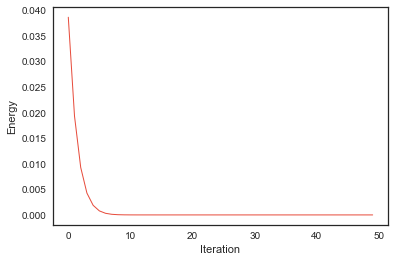

In [11]:
N = 128
t = 1.
U = 8
mu = 0.
Efermi = ( mu + U / 2 )

# For the annealing

beta0 = 1.01 # must be > 1
betaTarget = -1 # zero temperature
infty = 10000

# Set the geometry

K = oneDimensionalChain(N)

# Compute distances between configurations

nSeeds = 1
distNup = np.zeros((nSeeds, N))
distNdown = np.zeros((nSeeds, N))

for seed in np.arange(nSeeds):

    itMax = 50
    it = 0

    lbda = 0.02
    
    np.random.seed(seed)

    nUp = np.ones(N).astype(np.float64)
    nDown = 0.01 *np.random.rand(N).astype(np.float64)

    energies = np.zeros(itMax).astype(np.float64)

    #print('<n>: ', nUp.sum() + nDown.sum())

    while (it < itMax):

        # Annealing

        #if (beta < betaTarget and beta < infty): # > infty: zero temperature case
        #    beta = beta0 ** it
        #else:
        #    beta = betaTarget

        # Comment if you want to use annealing!
        
        beta = betaTarget
        
        C = - U * ( (nUp * nDown) / N)

        Hup = - t * K + U * np.eye(N, dtype = np.float64) * ( nDown + C / 2)
        Hdown = - t * K + U * np.eye(N, dtype = np.float64) * ( nUp + C / 2)


        eUp, wUp = la.eig(Hup)
        eDown, wDown = la.eig(Hdown)

        nUpOld = nUp.copy()
        nDownOld = nDown.copy()

        for i in range(N):
            nUp[i] = 0
            nDown[i] = 0
            for n in range(N):
                nUp[i] += abs(wUp[i, n])**2 * fermi(eUp[n].real, Efermi, beta)
                nDown[i] += abs(wDown[i, n])**2 * fermi(eDown[n].real, Efermi, beta)

        nUp = (0.5 + lbda * it) * nUp + (0.5 - lbda * it) * nUpOld
        nDown = (0.5 + lbda * it) * nDown + (0.5 - lbda * it) * nDownOld

        energies[it] = ( (eUp * fermi(eUp.real , Efermi , beta)).sum()\
                        + (eDown * fermi(eDown.real , Efermi , beta)).sum() ) / N

        it += 1
        
    print('Final energy: ', ( (eUp * fermi(eUp.real , Efermi , beta)).sum()\
        + (eDown * fermi(eDown.real , Efermi , beta)).sum() ) / N )
    plt.figure(seed)
    plt.plot(energies, color = "#e74c3c", linewidth = 1)
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    distNup[seed, :] = nUp
    distNdown[seed, :] = nDown    

## Compute the distance between configurations

In [12]:
np.dot(distNup[0, :] - distNup[1, :], distNup[0, :] - distNup[1, :])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [13]:
np.dot(distNdown[0, :] - distNdown[1, :], distNdown[0, :] - distNdown[1, :])

IndexError: index 1 is out of bounds for axis 0 with size 1

## Plot configurations

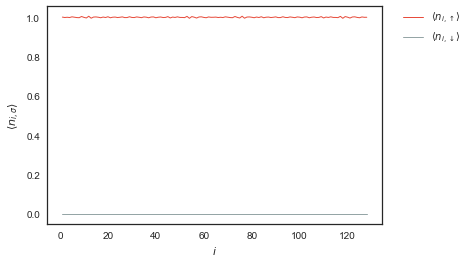

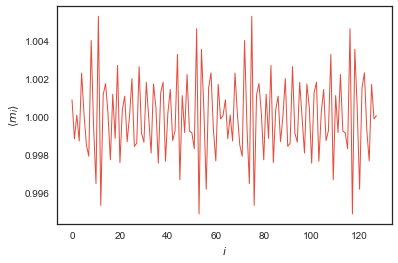

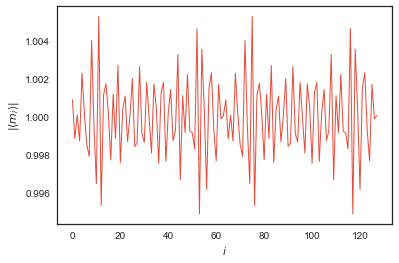

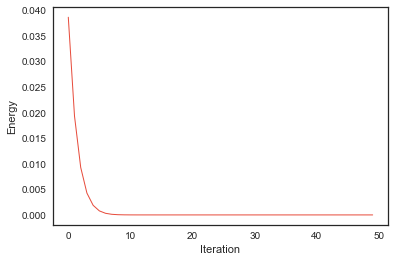

In [14]:
plot(nUp, nDown, energies, it)